# Asphalt Mixture Performance Prediction Using Machine Learning

Tianhao Yan, yantianhao2022@gmail.com, 7/24/2025

This project aims to develop machine learning model for performance prediction of asphalt mixtures based on a dataset shared by NCAT. 

The project contains 4 consecutive tasks:

1. Data Cleaning and Preparation
2. Data Comparison Across Years
3. Development of Models
4. Deployment of Developed Models


## Q1. Data Cleaning and Preparation

Three datasets were provided containing asphalt mix test results from the 2020,
2022, and 2023 construction seasons. These datasets include volumetric properties, Hamburg
Wheel Tracking Test (HWTT) results, and IDEAL-CT results for various mix types: IIS, III, IV, IVB,
and IVS. Please note that the data have been modified for this task and do not
represent the actual data collected. The files are titled:

• 2020 Test Result Summary.xlsx

• 2022 Test Result Summary.xlsx

• 2023 Test Result Summary.xlsx

For consistency:

• Treat Type IV and IVB as equivalent to Type IVS (9.5 mm).

• Treat Type II as equivalent to Type IIS (19.0 mm).

• Treat Type III as equivalent to Type IIIS.

Combine the three datasets into a one with consistent classification of mix types as
noted above. Address missing or invalid CT-Index values (e.g., entries with comments like “Not
enough material”).

In [27]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Dataset Combination and Classification

Load the three datasets corresponding to the three construction seasons.

In [28]:
data_2020 = pd.read_excel("2020 Test Result Summary.xlsx", header = 1)
data_2020 = data_2020.rename(columns={"Unnamed: 29":"Comments"}) # manually change the name of the last feature to "Comments"
data_2020["Construction Year"] = 2020
# display(data_2020)

data_2022 = pd.read_excel("2022 Test Result Summary.xlsx", header = 1, nrows=71)
data_2022["Construction Year"] = 2022
# display(data_2022)

data_2023 = pd.read_excel("2023 Test Result Summary.xlsx", header = 1)
data_2023["Construction Year"] = 2023
# display(data_2023)

Merge the three datasets into one.

In [29]:
data_all = pd.concat([data_2023,data_2022, data_2020], ignore_index=True, sort=False)
display(data_all)

,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)
0,4.0,dchase2359075316,2.0,2023-05-10,IV,20,70-28,80,NaN,100/100,...,63.4,16.6,3.0,NaN,2023,NaN,NaN,NaN,NaN,NaN
1,16.0,jgravel235T154037,1.0,2023-05-30,III,20,70-28,80,NaN,100/100,...,90.7,23.9,4.0,NaN,2023,NaN,NaN,NaN,NaN,NaN
2,19.0,mibailey235V074723,1.0,2023-06-01,III,20,70-28,80,NaN,100/100,...,65.4,32.1,4.0,NaN,2023,NaN,NaN,NaN,NaN,NaN
3,22.0,mibailey2365111430,2.0,2023-06-06,III,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN
4,23.0,dchase2362045459,6.0,2023-06-06,IV,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,kgarcia2086061740,6.0,2020-08-06,IIS,20,70-28,80,NaN,NaN,...,75.6,NaN,NaN,NaN,2020,3.9,15.0,1935.6,5.0,23.5
181,NaN,tcoletta208P070628,4.0,2020-08-25,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,159.5,NaN,NaN,NaN,2020,10.8,16.0,2024.6,6.0,18.6
182,NaN,mnagle208R122125,3.0,2020-08-27,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,172.6,NaN,NaN,NaN,2020,13.3,31.0,2203.1,11.0,17.7
183,NaN,mnagle2092124400,3.0,2020-09-02,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,159.8,NaN,NaN,NaN,2020,15.0,12.0,2106.5,6.0,26.9


Mix types were consolidated into three categories (IIS, IIIS, and IVS) following the prescribed classification guidelines to ensure consistency. 

Treat Type IV and IVB as equivalent to Type IVS (9.5 mm).

Treat Type II as equivalent to Type IIS (19.0 mm).

Treat Type III as equivalent to Type IIIS.

In [30]:
data_all['Type'] = data_all['Type'].apply(lambda x: "IVS" if x in ("IV", "IVB") else x)
data_all['Type'] = data_all['Type'].apply(lambda x: "IIS" if x == "II" else x)
data_all['Type'] = data_all['Type'].apply(lambda x: "IIIS" if x == "III" else x)
# display(data_all)

Count the Total and Valid Samples for Each Mix Type

In [31]:
# count total samples
types = ["IIS","IIIS","IVS"]

for type in types:
    number_count = np.sum([(data_all["Type"]==type)])
    print("Number of total samples of mix type " + type +f": {number_count}")
    

Number of total samples of mix type IIS: 43
Number of total samples of mix type IIIS: 9
Number of total samples of mix type IVS: 133


In [32]:
# count valid samples
performances = ["Avg. Rut Depth", "Avg. CTindex"]
types = ["IIS","IIIS","IVS"]
test = {"Avg. Rut Depth":"HWTT", "Avg. CTindex": "IDEAL-CT"}

for performance in performances:
    for type in types:
        number_count = 0
        number_locations = []

        my_list = data_all[performance][data_all["Type"]==type]
        for index, item in enumerate(my_list):
            # Check if the item is a number (e.g., an integer or float).
            if isinstance(item, (int, float)) and (not np.isnan(item)):
                number_count += 1
                number_locations.append(index)

        print("Number of valid "+ test[performance] + " samples of mix type " + type +f": {number_count}")


Number of valid HWTT samples of mix type IIS: 10
Number of valid HWTT samples of mix type IIIS: 2
Number of valid HWTT samples of mix type IVS: 91
Number of valid IDEAL-CT samples of mix type IIS: 42
Number of valid IDEAL-CT samples of mix type IIIS: 8
Number of valid IDEAL-CT samples of mix type IVS: 119


Addresing Missing or Invalid Data

invalid entries in CT-Index and HWTT Rut Depth (such as those annotated with comments like “Not enough material”) were replaced with NaN, the standard missing data marker in Python. Corresponding comment messages were extracted and stored separately in a dedicated "comments" column. All missing and invalid data points were uniformly labeled as NaN, facilitating straightforward exclusion during subsequent statistical analysis and machine learning modeling.

In [33]:
# Transfer error messages from 'Avg. Displacement @ 75% peak load (mm)' on IDEAL CT test to the 'Comment' column, replacing them with NaN
data_all['Comments'] = data_all['Avg. Displacement @ 75% peak load (mm)'].apply(lambda x: (x + '. ') if isinstance(x, str) else '') + data_all['Comments'].fillna('')
data_all['Avg. Displacement @ 75% peak load (mm)'] = data_all['Avg. Displacement @ 75% peak load (mm)'].apply(lambda x: np.nan if isinstance(x, str) else x)

# Transfer error messages from 'Avg. Rut Depth' on HWTT test to the 'Comment' column, replacing them with NaN
data_all['Comments'] = data_all['Avg. Rut Depth'].apply(lambda x: (x + '. ') if isinstance(x, str) else '') + data_all['Comments'].fillna('')
data_all['Avg. Rut Depth'] = data_all['Avg. Rut Depth'].apply(lambda x: np.nan if isinstance(x, str) else x)


### 1.2 Missing HWTT Data Analysis

The availability of valid HWTT Rut Depth data was further analyzed by construction year and mix type.

In [34]:
# Count number of total samples for each mix type and contruction year
years = [2020, 2022, 2023]
types = ["IIS","IIIS","IVS"]

for type in types:
    for year in years:
        number_count = np.sum([(data_all["Type"]==type) & (data_all["Construction Year"]==year)])
        print("Number of total samples of mix type " + type + " from " + str(year) +f": {number_count}")

Number of total samples of mix type IIS from 2020: 14
Number of total samples of mix type IIS from 2022: 12
Number of total samples of mix type IIS from 2023: 17
Number of total samples of mix type IIIS from 2020: 0
Number of total samples of mix type IIIS from 2022: 0
Number of total samples of mix type IIIS from 2023: 9
Number of total samples of mix type IVS from 2020: 37
Number of total samples of mix type IVS from 2022: 59
Number of total samples of mix type IVS from 2023: 37


In [35]:
# Count number of valid HWTT Rut Depth samples for each mix type and contruction year

performance = "Avg. Rut Depth"
years = [2020, 2022, 2023]
types = ["IIS","IIIS","IVS"]
test = {"Avg. Rut Depth":"HWTT", "Avg. CTindex": "IDEAL-CT"}

for type in types:
    for year in years:
        number_count = 0
        number_locations = []

        my_list = data_all[performance][(data_all["Type"]==type) & (data_all["Construction Year"]==year)]
        for index, item in enumerate(my_list):
            # Check if the item is a number (e.g., an integer or float).
            if isinstance(item, (int, float)) and (not np.isnan(item)):
                number_count += 1
                number_locations.append(index)

        print("Number of valid "+ test[performance] + " samples of mix type " + type + " from " + str(year) + f": {number_count}")


Number of valid HWTT samples of mix type IIS from 2020: 9
Number of valid HWTT samples of mix type IIS from 2022: 0
Number of valid HWTT samples of mix type IIS from 2023: 1
Number of valid HWTT samples of mix type IIIS from 2020: 0
Number of valid HWTT samples of mix type IIIS from 2022: 0
Number of valid HWTT samples of mix type IIIS from 2023: 2
Number of valid HWTT samples of mix type IVS from 2020: 32
Number of valid HWTT samples of mix type IVS from 2022: 47
Number of valid HWTT samples of mix type IVS from 2023: 12


### 1.3 Outlier Detection

Outliers were identified using the interquartile range (IQR), which reflects the spread of the middle 50% of the data. Data points are considered outliers if they fall below Q1−1.5×IQR or above Q3+1.5×IQR, where Q1 and Q3 are the first and third quartiles, respectively, and IQR=Q3−Q1. This robust method, popularized by Tukey (1977), is less influenced by extreme values compared to approaches based on the mean and standard deviation, and is effective for skewed or unknown distributions. The 1.5 × IQR threshold roughly corresponds to identifying points approximately two standard deviations from the mean in normally distributed data. 

Outlier Detection for CT-Index

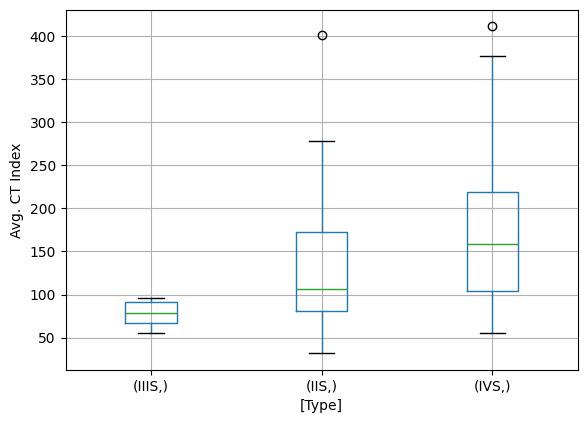

Outliers in mix type IIS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)
160,NaN,tcoletta206T095745,6.0,2020-06-29,IIS,20,70-28,80,0.5% Rediset LQ,NaN,...,401.0,NaN,NaN,,2020,22.1,36.0,2131.0,13.0,14.0


Outliers in mix type IIIS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)


Outliers in mix type IVS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)
131,71.0,sfout22AC222600,5.0,2022-10-21,IVS,20,70-28,80,0.5% Rediset LQ,100/100,...,411.2,7.3,3.0,,2022,NaN,NaN,NaN,NaN,NaN


"\nax = data_or.boxplot(column=performance, by=['Type'])\nax.set_ylabel('Avg. CT Index')\nplt.title('Boxplot Grouped by Mix Type')\nplt.suptitle('')\nplt.show()\n"

In [36]:
# boxplot visualization and outlier removal for CT-Index
performance = "Avg. CTindex"
types = ["IIS","IIIS","IVS"]
data_or = data_all.copy() # outlier-removed dataset was saved to data_or

ax = data_all.boxplot(column=performance, by=['Type'])
ax.set_ylabel('Avg. CT Index')
plt.title('')
plt.suptitle('')
plt.show()

for type in types:
    Q1 = data_all[performance][data_all["Type"]==type].quantile(0.25)
    Q3 = data_all[performance][data_all["Type"]==type].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_outliers = data_all[(data_all["Type"]==type) & ((data_all[performance] < lower_bound) | (data_all[performance] > upper_bound))]

    print("Outliers in mix type " + type +":")
    display(data_outliers)

    #data_or = data_or[((data_or["Type"]==type) & ((data_or[performance] >= lower_bound) & (data_or[performance] <= upper_bound))) | (data_or["Type"]!=type)]
    data_or = data_or.drop(data_outliers.index)

'''
ax = data_or.boxplot(column=performance, by=['Type'])
ax.set_ylabel('Avg. CT Index')
plt.title('Boxplot Grouped by Mix Type')
plt.suptitle('')
plt.show()
'''

Outlier Detection for HWTT

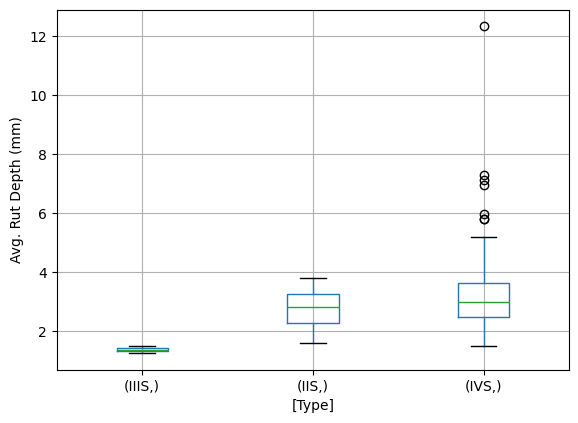

Outliers in mix type IIS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)


Outliers in mix type IIIS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)


Outliers in mix type IVS:


,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)
69,7.0,kgarcia225V072025,NaN,2022-05-31,IVS,0,70-28,65,NaN,100/100,...,376.0,2.9,3.0,"HWTT Testing: one paired set failed, other passed",2022,NaN,NaN,NaN,NaN,NaN
80,18.0,tcoletta227G055228,1.0,2022-07-16,IVS,20,70-28,50,NaN,100/100,...,174.9,18.2,5.0,,2022,NaN,NaN,NaN,NaN,NaN
88,26.0,nhersey227R060522,3.0,2022-07-29,IVS,15,70-28,65,NaN,100/100,...,146.5,8.6,6.0,,2022,NaN,NaN,NaN,NaN,NaN
134,NaN,tcoletta206C115456,1.0,2020-06-12,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,341.1,NaN,NaN,,2020,16.0,16.0,2756.0,5.0,9.9
135,NaN,tcoletta206G065545,1.0,2020-06-16,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,224.2,NaN,NaN,,2020,12.3,32.0,2435.9,7.0,12.4
148,NaN,dhill208B1002003,3.0,2020-08-11,IVS,20,70-28,65,NaN,NaN,...,278.3,NaN,NaN,,2020,14.4,11.0,2319.1,10.0,3.6
154,NaN,aschwart209U130941,6.0,2020-09-30,IVS,20,70-28,50,NaN,NaN,...,244.8,NaN,NaN,,2020,11.8,25.0,2362.6,9.0,23.5


"\nax = data_or.boxplot(column=performance, by=['Type'])\nax.set_ylabel('Avg. Rut Depth (mm)')\nplt.title('')\nplt.suptitle('')\nplt.show()\n"

In [37]:
# boxplot visualization and outlier removal for HWTT
performance = "Avg. Rut Depth"
types = ["IIS","IIIS","IVS"]

ax = data_all.boxplot(column=performance, by=['Type'])
ax.set_ylabel("Avg. Rut Depth (mm)")
plt.title('')
plt.suptitle('')
plt.show()

for type in types:
    Q1 = data_all[performance][data_all["Type"]==type].quantile(0.25)
    Q3 = data_all[performance][data_all["Type"]==type].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_outliers = data_all[(data_all["Type"]==type) & ((data_all[performance] < lower_bound) | (data_all[performance] > upper_bound))]

    print("Outliers in mix type " + type +":")
    display(data_outliers)

    #data_or = data_or[((data_or["Type"]==type) & ((data_or[performance] >= lower_bound) & (data_or[performance] <= upper_bound))) | (data_or["Type"]!=type)]
    data_or = data_or.drop(data_outliers.index)

'''
ax = data_or.boxplot(column=performance, by=['Type'])
ax.set_ylabel('Avg. Rut Depth (mm)')
plt.title('')
plt.suptitle('')
plt.show()
'''

Display the outlier-removed dataset

In [38]:
display(data_or)

,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,Avg. CTindex,CTindex COV (%),Number of Pucks,Comments,Construction Year,Avg. FI,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%)
0,4.0,dchase2359075316,2.0,2023-05-10,IVS,20,70-28,80,NaN,100/100,...,63.4,16.6,3.0,,2023,NaN,NaN,NaN,NaN,NaN
1,16.0,jgravel235T154037,1.0,2023-05-30,IIIS,20,70-28,80,NaN,100/100,...,90.7,23.9,4.0,,2023,NaN,NaN,NaN,NaN,NaN
2,19.0,mibailey235V074723,1.0,2023-06-01,IIIS,20,70-28,80,NaN,100/100,...,65.4,32.1,4.0,,2023,NaN,NaN,NaN,NaN,NaN
3,22.0,mibailey2365111430,2.0,2023-06-06,IIIS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,,2023,NaN,NaN,NaN,NaN,NaN
4,23.0,dchase2362045459,6.0,2023-06-06,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,,2023,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,kgarcia2086061740,6.0,2020-08-06,IIS,20,70-28,80,NaN,NaN,...,75.6,NaN,NaN,,2020,3.9,15.0,1935.6,5.0,23.5
181,NaN,tcoletta208P070628,4.0,2020-08-25,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,159.5,NaN,NaN,,2020,10.8,16.0,2024.6,6.0,18.6
182,NaN,mnagle208R122125,3.0,2020-08-27,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,172.6,NaN,NaN,,2020,13.3,31.0,2203.1,11.0,17.7
183,NaN,mnagle2092124400,3.0,2020-09-02,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,159.8,NaN,NaN,,2020,15.0,12.0,2106.5,6.0,26.9


Save the merged dataset into EXCEL. the entire dataset was saved in Sheet1 and the outlier-removed dataset was saved to sheet2

In [39]:
# Write the database to Excel
with pd.ExcelWriter('NCAT Test Results Dataset.xlsx', engine='openpyxl') as writer:
    data_all.to_excel(writer, sheet_name='All', index=True)
    data_or.to_excel(writer, sheet_name='Outlier Removed', index=True)